the name of the used dataset is Salary_dataset


第1步：导入必要的Python库

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

第2步：加载数据集并查看前几行

In [2]:
data = pd.read_csv('dataset\Salary_dataset.csv')
print(data.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


第3步：数据预处理

In [3]:
data = data.drop('Unnamed: 0', axis=1)
X = data[['YearsExperience']].values  # 提取特征矩阵（二维数组）
y = data['Salary'].values  # 提取目标向量

第4步：验证数据形状

In [4]:
print("X的形状:", X.shape)
print("y的形状:", y.shape)

X的形状: (30, 1)
y的形状: (30,)


第5步：拆分训练集和测试集

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test)) # 验证拆分比例是否正确
print(y_train.shape)
print(y_test.shape)
y_train = y_train.reshape(-1,1) # 改变形状为列向量
y_test = y_test.reshape(-1,1) # 改变形状为列向量
print(y_train.shape)
print(y_test.shape)


24 6
(24,)
(6,)
(24, 1)
(6, 1)


第6步：特征标准化（关键预处理）



In [6]:
# 计算训练集的均值和标准差
X_train_mean = np.mean(X_train)
X_train_std = np.std(X_train)

# 对训练集和测试集进行标准化
X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std

print("标准化后训练集均值:", np.mean(X_train_scaled))  # 应该接近0
print("标准化后训练集标准差:", np.std(X_train_scaled))  # 应该接近1

标准化后训练集均值: -2.590520390792032e-16
标准化后训练集标准差: 1.0


第7步：实现梯度下降核心逻辑

In [7]:
# 超参数设置
learning_rate = 0.01 # 学习率（后续可调整）
epochs = 1000         # 迭代次数

# 参数初始化（关键起点）
np.random.seed(42)    # 固定随机种子
w = np.random.randn() # 权重（斜率参数）
b = np.random.randn() # 偏置（截距参数）

# 存储训练过程指标
loss_history = []

# 梯度下降主循环
for epoch in range(epochs):
    # 前向传播（计算预测值）
    y_pred = w * X_train_scaled + b
    
    # 计算损失（MSE）
    loss = np.mean((y_pred - y_train)**2)
    loss_history.append(loss)
    
    # 反向传播（计算梯度）
    dw = (2/len(y_train)) * np.dot(X_train_scaled.T, (y_pred - y_train))  # 权重梯度
    db = (2/len(y_train)) * np.sum(y_pred - y_train)                      # 偏置梯度
    
    # 参数更新
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # 每100次打印进度
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss={loss:.2f}, w={w[0][0]:.3f}, b={b:.3f}")

Epoch 0: Loss=6271221806.68, w=543.518, b=1484.037
Epoch 100: Loss=136923491.10, w=23622.794, b=64563.922
Epoch 200: Loss=29033779.86, w=26683.557, b=72929.549
Epoch 300: Loss=27136221.38, w=27089.474, b=74038.994
Epoch 400: Loss=27102847.22, w=27143.307, b=74186.129
Epoch 500: Loss=27102260.24, w=27150.446, b=74205.642
Epoch 600: Loss=27102249.92, w=27151.393, b=74208.229
Epoch 700: Loss=27102249.73, w=27151.518, b=74208.573
Epoch 800: Loss=27102249.73, w=27151.535, b=74208.618
Epoch 900: Loss=27102249.73, w=27151.537, b=74208.624


可视化训练过程

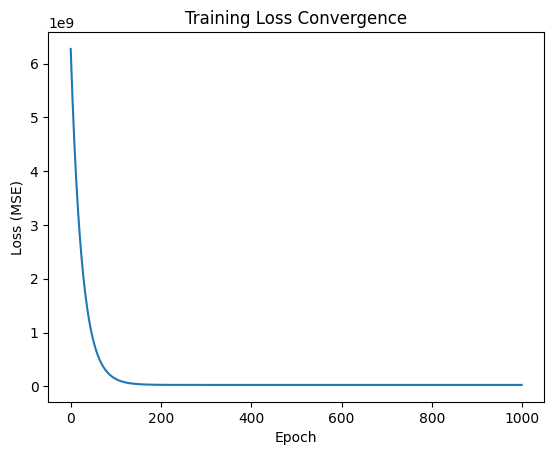

In [8]:
# 绘制损失下降曲线
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Convergence")
plt.show()

第八步: 测试集预测与评估

In [9]:
# 使用训练好的参数对测试集进行预测
y_pred_test = w * X_test_scaled + b

# 计算测试集上的损失（MSE）
test_loss = np.mean((y_pred_test - y_test)**2)
print(f"\nTest Loss (MSE): {test_loss:.2f}")

# 可选：计算R²分数
ss_res = np.sum((y_test - y_pred_test)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2_score = 1 - (ss_res / ss_tot)
print(f"Test R² Score: {r2_score:.2f}")


Test Loss (MSE): 49830097.66
Test R² Score: 0.90


可视化预测结果

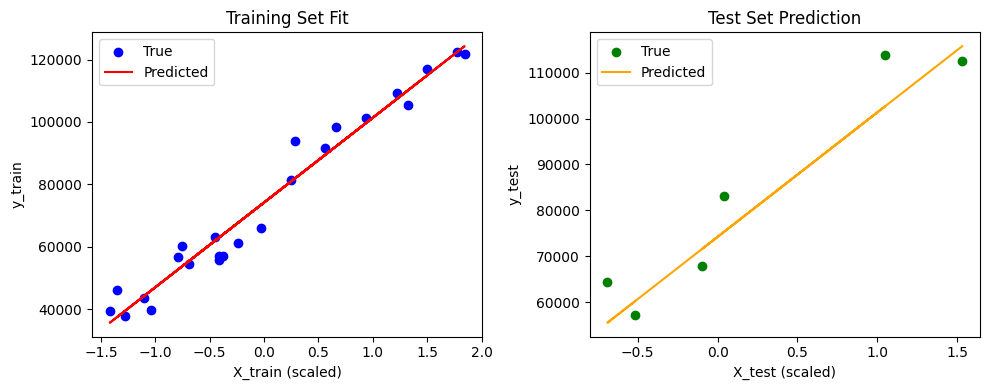

In [10]:
# 绘制训练集和测试集的真实值 vs 预测值
plt.figure(figsize=(10, 4))

# 训练集结果
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled, y_train, label="True", color="blue")
plt.plot(X_train_scaled, w * X_train_scaled + b, label="Predicted", color="red")
plt.xlabel("X_train (scaled)")
plt.ylabel("y_train")
plt.title("Training Set Fit")
plt.legend()

# 测试集结果
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled, y_test, label="True", color="green")
plt.plot(X_test_scaled, w * X_test_scaled + b, label="Predicted", color="orange")
plt.xlabel("X_test (scaled)")
plt.ylabel("y_test")
plt.title("Test Set Prediction")
plt.legend()

plt.tight_layout()
plt.show()

反推标准化前的参数，得到原始预测等式

In [11]:
print(w[0][0],b)


27151.537380139365 74208.62487510912
